# 範例1. 使用自動微分估算簡單線性迴歸的參數(w、b)
## $ y = wx + b$

In [1]:
# 若出現以下錯誤，請執行本格
# OMP: Error #15: Initializing libiomp5md.dll, but found libiomp5md.dll already initialized.
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [2]:
# 載入套件
import numpy as np 
import tensorflow as tf 

## 定義訓練函數

In [3]:
# 定義損失函數
def loss(y, y_pred):
    return tf.reduce_mean(tf.square(y - y_pred))

In [4]:
# 定義預測值函數
def predict(X):
    return w * X + b    

In [5]:
# 定義訓練函數
def train(X, y, epochs=40, lr=0.0001):
    current_loss=0                                # 損失函數值
    for epoch in range(epochs):                   # 執行訓練週期
        with tf.GradientTape() as t:              # 自動微分
            t.watch(tf.constant(X))               # 宣告 TensorFlow 常數參與自動微分
            current_loss = loss(y, predict(X))    # 計算損失函數值
        
        dw, db = t.gradient(current_loss, [w, b]) # 取得 w, b 個別的梯度

        # 更新權重：新權重 = 原權重 — 學習率(learning_rate) * 梯度(gradient)
        w.assign_sub(lr * dw) # w -= lr * dw
        b.assign_sub(lr * db) # b -= lr * db

        # 顯示每一訓練週期的損失函數
        print(f'Epoch {epoch}: Loss: {current_loss.numpy()}') 

## 產生隨機資料

In [6]:
# 產生線性隨機資料100筆，介於 0-50
n = 100
X = np.linspace(0, 50, n) 
y = np.linspace(0, 50, n) 
  
# 資料加一點雜訊(noise)
X += np.random.uniform(-10, 10, n) 
y += np.random.uniform(-10, 10, n) 

In [7]:
X

array([-7.39929496,  5.27887113,  8.58368567,  5.08554529,  4.73696726,
        4.80417075, -0.16754152,  6.29050595,  6.84778339,  3.71544693,
        7.04533554,  3.21895101, -3.5355899 ,  8.94145037, 15.77520142,
       16.75931193, 14.67268532,  1.90108643,  1.08666854,  3.18745744,
        3.54247452, 10.96264067, 18.04590946,  7.85209812,  6.9904009 ,
       20.90055317,  9.81671183, 23.07981704, 22.94274342, 23.21229902,
        8.17215741, 14.85819029,  7.09305137, 17.48104104, 10.4428392 ,
       21.18379552, 18.32356898,  9.50830451, 11.19213081, 17.31207958,
       10.56401765, 23.26160971, 21.92801814, 14.31120022, 27.36763582,
       30.0338805 , 19.02427541, 24.30868101, 18.34565512, 25.6135596 ,
       24.40738255, 18.14654403, 23.59211764, 35.12079482, 35.66833236,
       37.59186618, 20.10007933, 20.93489168, 21.73541971, 27.0681707 ,
       25.63741701, 22.91515822, 32.53003671, 26.26935385, 35.30460883,
       24.90831758, 42.12611456, 35.69765203, 34.3256547 , 37.81

In [8]:
y

array([-9.12948607,  2.87942297, 10.20077069, 10.07269956, -2.82028054,
        4.48547853, 12.86997258, -6.17746914,  9.02852195,  7.73752849,
        0.12760067, 13.29830634,  3.79542362, -1.25355099,  0.30462085,
       10.47023268, 11.05705724, 11.42304527, 10.59941041, 18.65463048,
       18.05371939,  6.0777628 ,  9.48416054,  6.75085615, 15.65187761,
        4.82227792,  9.75395343, 21.84337354,  5.51768319, 19.69752784,
        5.42348785, 10.89899245, 22.34801592, 22.22168113, 13.85638105,
       22.72233061, 17.79618387, 28.25897909, 24.10734637, 22.83992712,
       20.72198728, 24.68105688, 26.77382035, 31.41745228, 13.59044834,
       32.57150614, 30.06139275, 21.14492295, 27.18098734, 33.70715947,
       27.28144266, 24.9048914 , 25.33057704, 30.33186546, 22.06288042,
       30.20772247, 35.82834547, 32.01029689, 19.58864843, 21.95086849,
       32.6485352 , 21.76428309, 33.26315051, 35.86108481, 35.28999916,
       40.98946968, 37.64274297, 34.27425089, 37.57875161, 37.69

## 執行訓練

In [9]:
# w、b 初始值均設為 0
w = tf.Variable(0.0)
b = tf.Variable(0.0)

# 執行訓練
train(X, y)

# w、b 的最佳解
print(f'w={w.numpy()}, b={b.numpy()}')

Epoch 0: Loss: 932.6534423828125
Epoch 1: Loss: 652.1681518554688
Epoch 2: Loss: 462.82940673828125
Epoch 3: Loss: 335.0180358886719
Epoch 4: Loss: 248.74017333984375
Epoch 5: Loss: 190.4989776611328
Epoch 6: Loss: 151.18360900878906
Epoch 7: Loss: 124.64395141601562
Epoch 8: Loss: 106.72840881347656
Epoch 9: Loss: 94.63444519042969
Epoch 10: Loss: 86.47028350830078
Epoch 11: Loss: 80.95890045166016
Epoch 12: Loss: 77.23823547363281
Epoch 13: Loss: 74.72637176513672
Epoch 14: Loss: 73.03050994873047
Epoch 15: Loss: 71.8854751586914
Epoch 16: Loss: 71.1122817993164
Epoch 17: Loss: 70.59007263183594
Epoch 18: Loss: 70.23729705810547
Epoch 19: Loss: 69.99890899658203
Epoch 20: Loss: 69.83772277832031
Epoch 21: Loss: 69.7286605834961
Epoch 22: Loss: 69.65476989746094
Epoch 23: Loss: 69.6046371459961
Epoch 24: Loss: 69.5705337524414
Epoch 25: Loss: 69.54724884033203
Epoch 26: Loss: 69.5312728881836
Epoch 27: Loss: 69.52022552490234
Epoch 28: Loss: 69.51250457763672
Epoch 29: Loss: 69.507034

## 顯示迴歸線

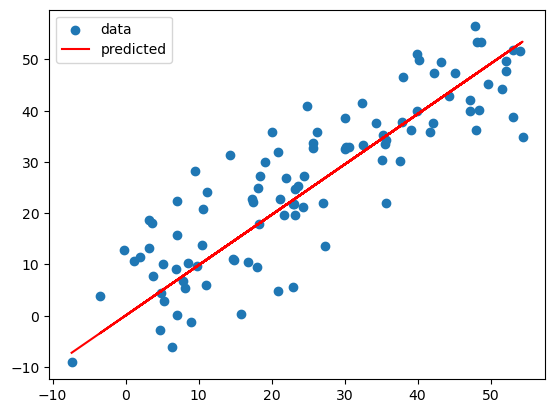

In [10]:
import matplotlib.pyplot as plt 

plt.scatter(X, y, label='data')
plt.plot(X, predict(X), 'r-', label='predicted')
plt.legend()